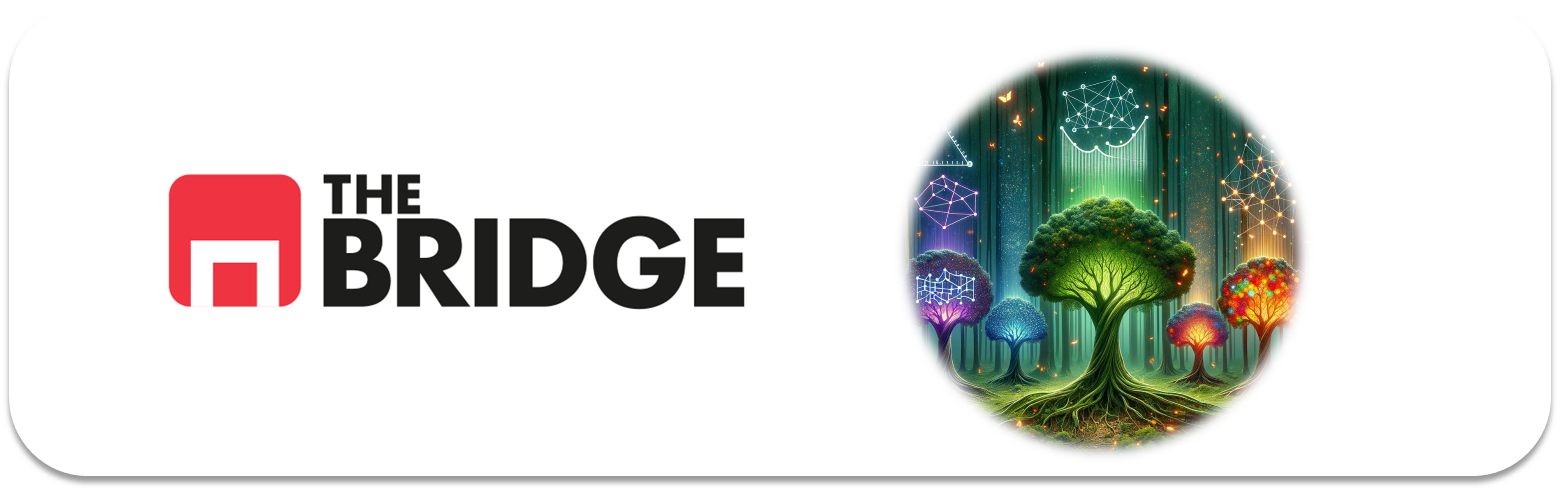

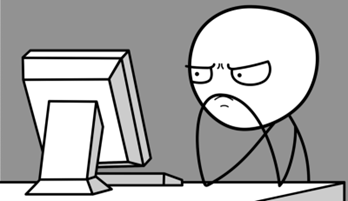

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Importamos los paquetes y módulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error as MAE



### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
# Importamos el archivo CSV desde la ruta completa
file_path = r"C:\Users\mario\Documents\GitHub\ONLINE_DS_THEBRIDGE_27MarioGomez\04_Machine_Learning\Sprint_11\Unidad_01\Ejercicios_Workout\data\temps.csv"

# Leemos el archivo CSV
df = pd.read_csv(file_path)

# Visualizamos las primeras filas para verificar que se ha cargado correctamente
print(df.head())


   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [3]:
# Realizamos el one-hot encoding de las columnas categóricas
df_encoded = pd.get_dummies(df, columns=['month', 'week'])

# Verificamos las nuevas columnas generadas
print(df_encoded.head())


   year  day  temp_2  temp_1  average  actual  forecast_noaa  forecast_acc  \
0  2016    1      45      45     45.6      45             43            50   
1  2016    2      44      45     45.7      44             41            50   
2  2016    3      45      44     45.8      41             43            46   
3  2016    4      44      41     45.9      40             44            48   
4  2016    5      41      40     46.0      44             46            46   

   forecast_under  friend  ...  month_10  month_11  month_12  week_Fri  \
0              44      29  ...     False     False     False      True   
1              44      61  ...     False     False     False     False   
2              47      56  ...     False     False     False     False   
3              46      53  ...     False     False     False     False   
4              46      41  ...     False     False     False     False   

   week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed  
0     False     Fal

### Ejercicio 3

Divide en train y test

In [4]:
# Separar las características y la variable objetivo
X = df_encoded.drop(columns=['actual'])
y = df_encoded['actual']

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las formas de los datos
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (278, 28), Test shape: (70, 28)


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [5]:
# Instanciamos el modelo con hiperparámetros por defecto
tree_regressor = DecisionTreeRegressor(random_state=42)

# Entrenamos el modelo
tree_regressor.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
y_pred = tree_regressor.predict(X_test)
print(f"MAE del modelo: {MAE(y_test, y_pred):.2f}")


MAE del modelo: 4.84


### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [6]:
# Cálculo manual del MAE
mae_manual = np.mean(np.abs(y_test - y_pred))
print(f"MAE calculado manualmente: {mae_manual:.2f}")


MAE calculado manualmente: 4.84


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [7]:
# Cálculo manual del MAPE
mape_manual = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE calculado manualmente: {mape_manual:.2f}%")


MAPE calculado manualmente: 7.61%


### Ejercicio 7

Representa el árbol de decision

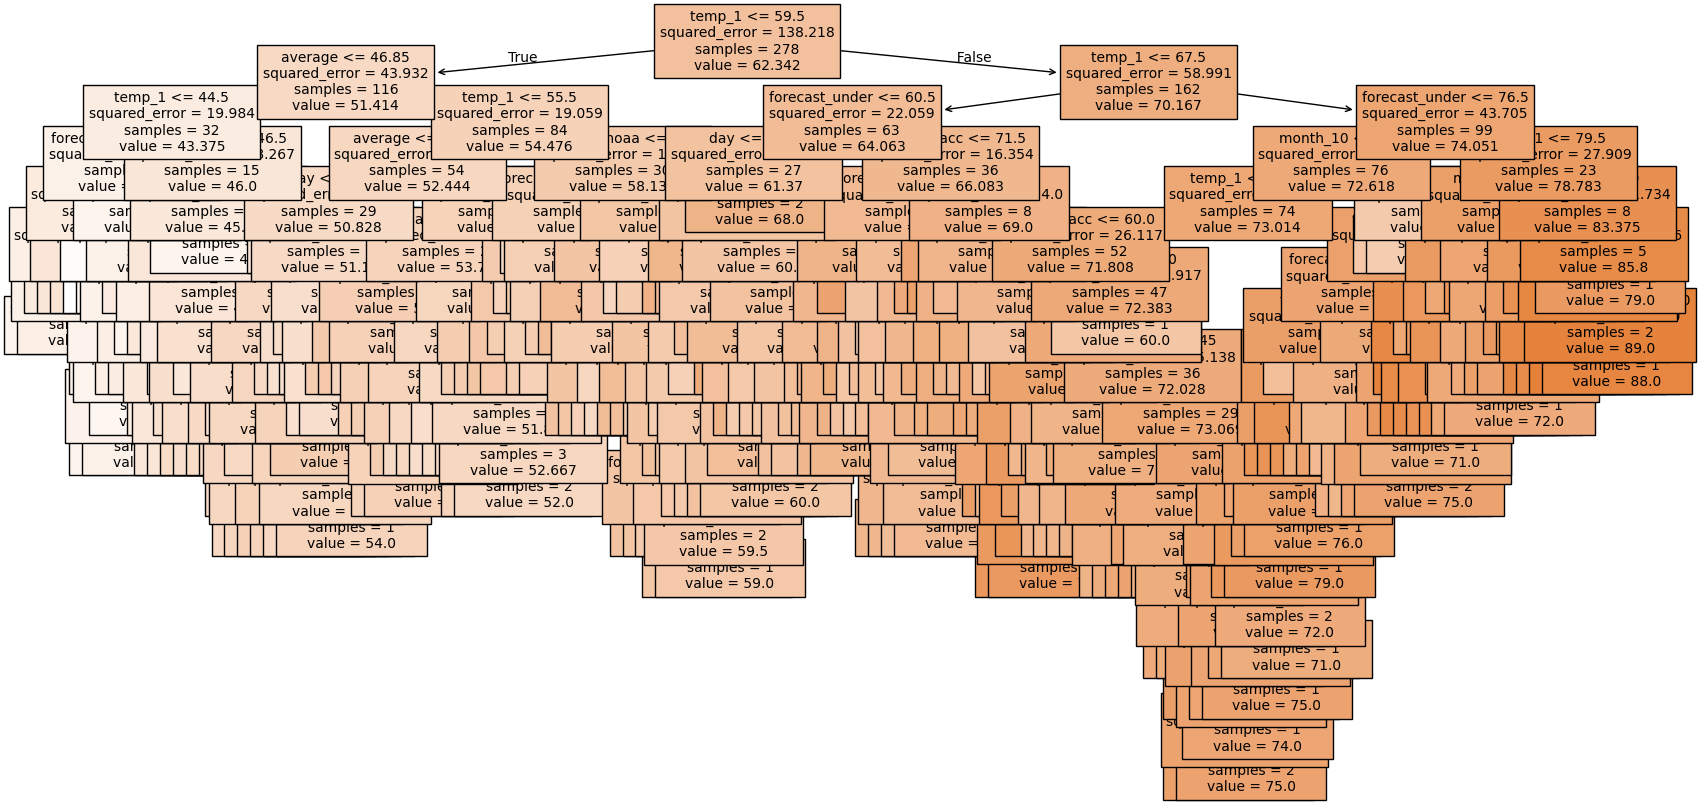

In [8]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, fontsize=10)
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [9]:
# Instanciamos un nuevo modelo con max_depth=3
tree_regressor_limited = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenamos el modelo
tree_regressor_limited.fit(X_train, y_train)

# Evaluamos el modelo
y_pred_limited = tree_regressor_limited.predict(X_test)
print(f"MAE con max_depth=3: {MAE(y_test, y_pred_limited):.2f}")


MAE con max_depth=3: 4.42


### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [11]:
# Cálculo del MAE
mae_limited = np.mean(np.abs(y_test - y_pred_limited))
print(f"MAE (max_depth=3): {mae_limited:.2f}")

# Cálculo del MAPE
mape_limited = np.mean(np.abs((y_test - y_pred_limited) / y_test)) * 100
print(f"MAPE (max_depth=3): {mape_limited:.2f}")



MAE (max_depth=3): 4.42
MAPE (max_depth=3): 6.94


### Ejercicio 10

Vuelve a representar su árbol

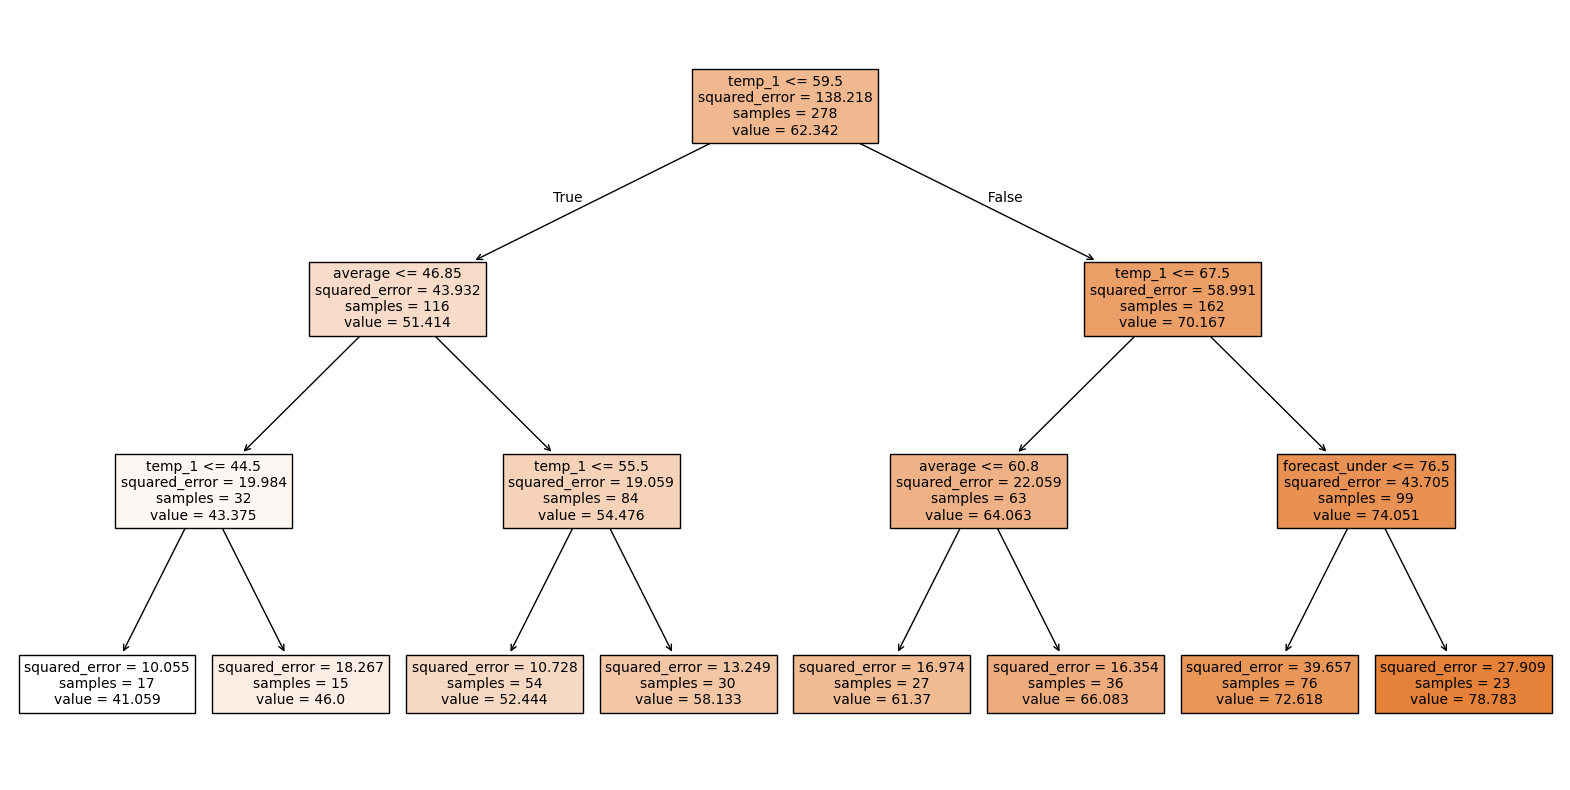

In [12]:
# Visualizamos el árbol de decisión con max_depth=3
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor_limited, feature_names=X.columns, filled=True, fontsize=10)
plt.show()


### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

           Feature  Importance
3           temp_1    0.880208
4          average    0.099022
7   forecast_under    0.020771
0             year    0.000000
2           temp_2    0.000000
1              day    0.000000
5    forecast_noaa    0.000000
6     forecast_acc    0.000000
8           friend    0.000000
9          month_1    0.000000
10         month_2    0.000000
11         month_3    0.000000
12         month_4    0.000000
13         month_5    0.000000
14         month_6    0.000000
15         month_7    0.000000
16         month_8    0.000000
17         month_9    0.000000
18        month_10    0.000000
19        month_11    0.000000
20        month_12    0.000000
21        week_Fri    0.000000
22        week_Mon    0.000000
23        week_Sat    0.000000
24        week_Sun    0.000000
25      week_Thurs    0.000000
26       week_Tues    0.000000
27        week_Wed    0.000000


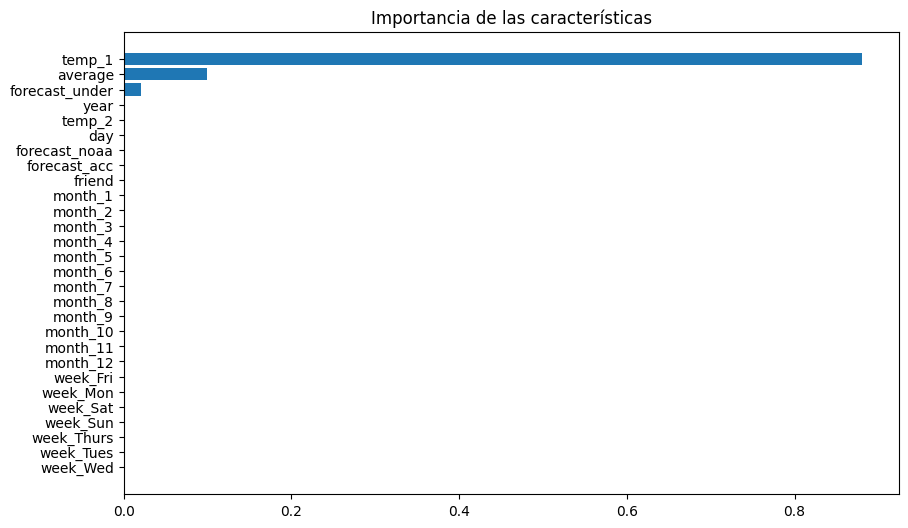

In [13]:
# Extraemos las importancias de las características
feature_importances = tree_regressor_limited.feature_importances_

# Creamos un DataFrame para visualizarlo
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

# Visualizamos las importancias en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Importancia de las características")
plt.show()
